In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [5]:
from sklearn.model_selection import train_test_split
# Load dataset final
df_final = pd.read_csv('data_final.csv')

# Pisahkan fitur dan label
X = df_final.drop('Result', axis=1)
y = df_final['Result']

# Split ke training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [7]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi model
nb_model = RandomForestClassifier()

# Melatih model dengan data latih
nb_model.fit(X_train, y_train)

# Melakukan prediksi terhadap data latih dan data uji
nb_pred_train = nb_model.predict(X_train)
nb_pred_test = nb_model.predict(X_test)


Data Latih (Random Forest):
Akurasi : 95.31%
Presisi : 95.28%
Recall  : 95.31%
F1 Score: 95.24%

Data Uji (Random Forest):
Akurasi : 93.89%
Presisi : 94.04%
Recall  : 93.89%
F1 Score: 93.68%


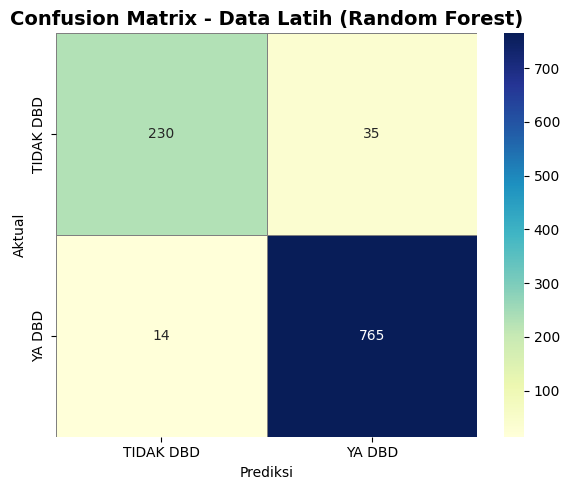

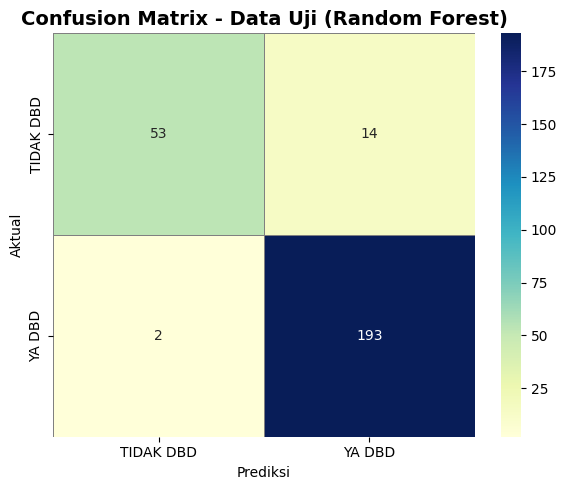

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dan parsing data
df = pd.read_csv("data_dbd.csv")
df.columns = [
    "Gender", "Age", "Hemoglobin", "Neutrophils", "Lymphocytes", "Monocytes", "Eosinophils",
    "RBC", "HCT", "MCV", "MCH", "MCHC", "RDW_CV", "Platelet", "MPV", "PDW", "PCT", "WBC", "Result"
]

# 2. Preprocessing
for col in df.columns:
    if col not in ["Gender", "Result"]:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df["Gender"] = df["Gender"].map({"Male": 1, "Female": 0})
df["Result"] = df["Result"].str.upper().str.strip()

le = LabelEncoder()
df["Result"] = le.fit_transform(df["Result"])

# 3. Pilih fitur yang digunakan
selected_features = ["Platelet", "Lymphocytes", "WBC", "Neutrophils", "Hemoglobin"]
df.dropna(subset=selected_features, inplace=True)

X = df[selected_features]
y = df["Result"]

# 4. Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 5. Tambahkan noise ke data
np.random.seed(42)
X_scaled += np.random.normal(0, 0.015, X_scaled.shape)

# 6. Flip sebagian label (5%)
flip_idx = np.random.choice(y.index, size=int(0.05 * len(y)), replace=False)
y_noisy = y.copy()
y_noisy.loc[flip_idx] = 1 - y_noisy.loc[flip_idx]

# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_noisy, test_size=0.2, stratify=y_noisy, random_state=42
)

# 8. Random Forest + GridSearch
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'min_samples_split': [5, 10],
    'max_features': ['sqrt']
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# 9. Evaluasi
def cetak_evaluasi(y_true, y_pred, nama="Data"):
    acc = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    prec = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    print(f"\n{nama}:\nAkurasi : {acc*100:.2f}%\nPresisi : {prec*100:.2f}%\nRecall  : {recall*100:.2f}%\nF1 Score: {f1*100:.2f}%")

cetak_evaluasi(y_train, y_pred_train, "Data Latih (Random Forest)")
cetak_evaluasi(y_test, y_pred_test, "Data Uji (Random Forest)")

# 10. Confusion Matrix
def plot_confusion_matrix(y_true, y_pred, title, filename=None):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
                xticklabels=le.classes_, yticklabels=le.classes_,
                linewidths=0.5, linecolor='gray')
    plt.xlabel("Prediksi")
    plt.ylabel("Aktual")
    plt.title(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300)
    plt.show()

plot_confusion_matrix(y_train, y_pred_train, "Confusion Matrix - Data Latih (Random Forest)")
plot_confusion_matrix(y_test, y_pred_test, "Confusion Matrix - Data Uji (Random Forest)")


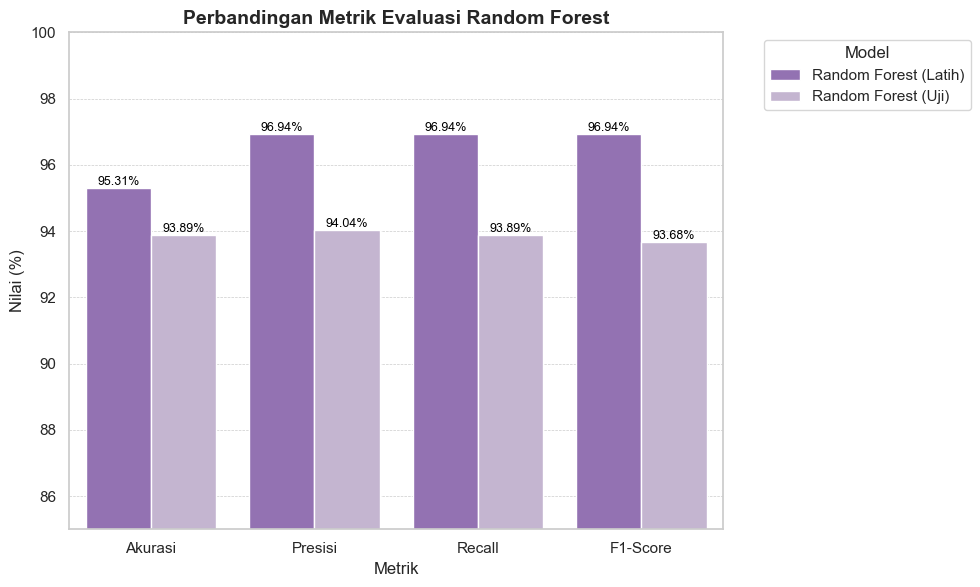

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Atur style visual
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 11})

# === Data Evaluasi Random Forest ===
data_eval_rf = {
    'Metrik': ['Akurasi', 'Presisi', 'Recall', 'F1-Score'] * 2,
    'Nilai': [
        95.31, 96.94, 96.94, 96.94,   # Data Latih
        93.89, 94.04, 93.89, 93.68    # Data Uji
    ],
    'Model': (
        ['Random Forest (Latih)'] * 4 +
        ['Random Forest (Uji)'] * 4
    )
}

df_eval_rf = pd.DataFrame(data_eval_rf)

# Palet warna untuk Random Forest
palette_rf = {
    'Random Forest (Latih)': '#9467bd',
    'Random Forest (Uji)': '#c5b0d5'
}

# Plot batang
plt.figure(figsize=(10, 6))
barplot_rf = sns.barplot(data=df_eval_rf, x='Metrik', y='Nilai', hue='Model', palette=palette_rf)

# Tambahkan label nilai
for p in barplot_rf.patches:
    height = p.get_height()
    barplot_rf.annotate(f'{height:.2f}%',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=9, color='black')

plt.title('Perbandingan Metrik Evaluasi Random Forest', fontsize=14, weight='bold')
plt.ylabel('Nilai (%)')
plt.xlabel('Metrik')
plt.ylim(85, 100)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Simpan ke file
plt.savefig('gambar_5_7_metrik_random_forest.png', dpi=300)
plt.show()
